In [1]:
import matplotlib.pyplot as plt
import numpy as np

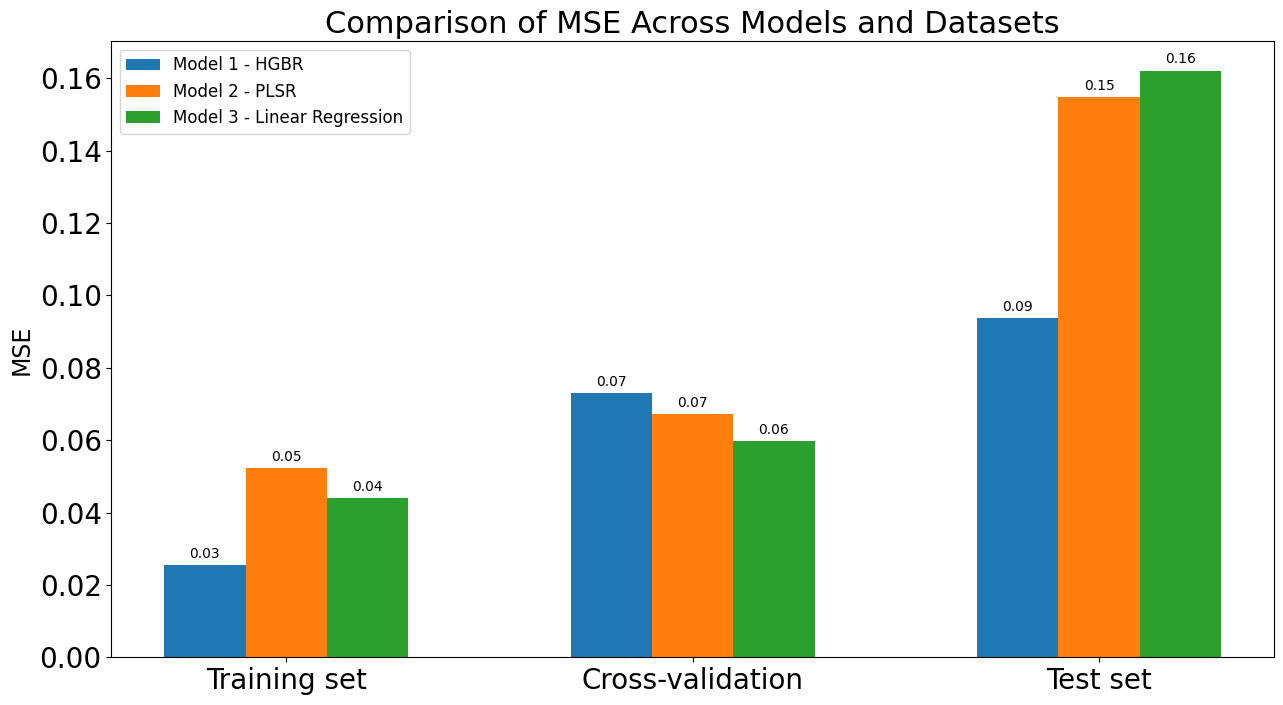

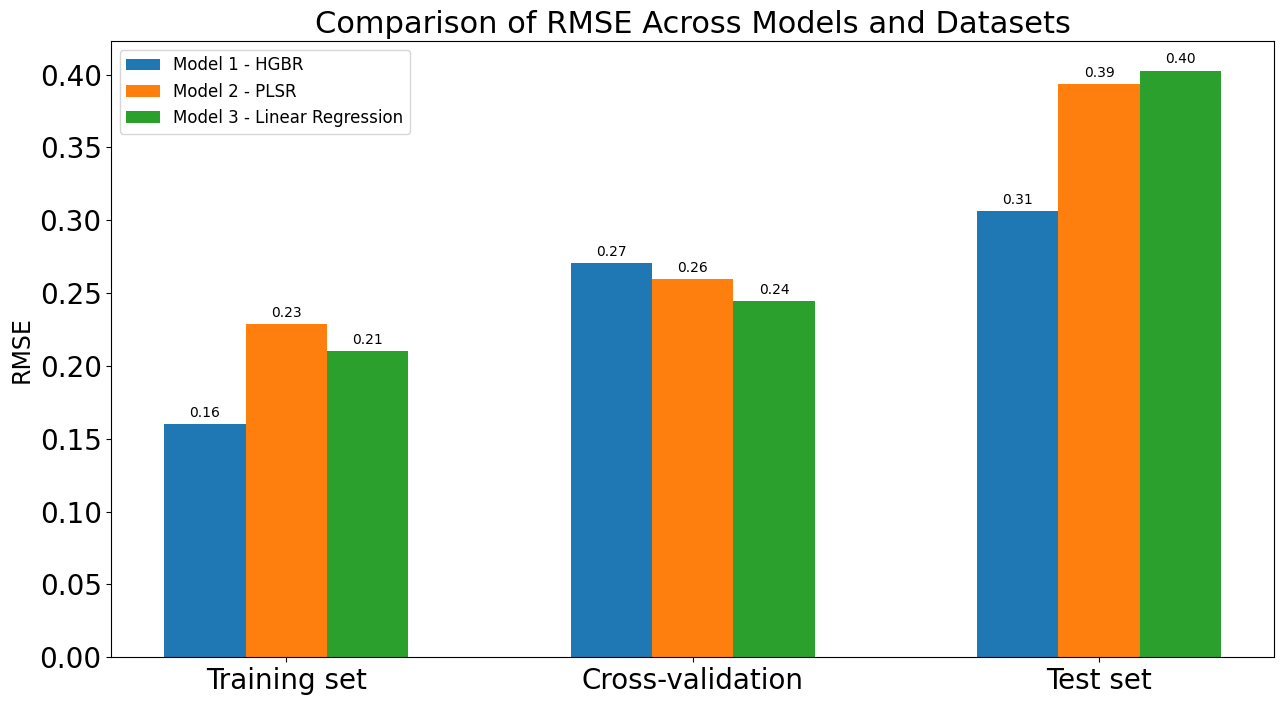

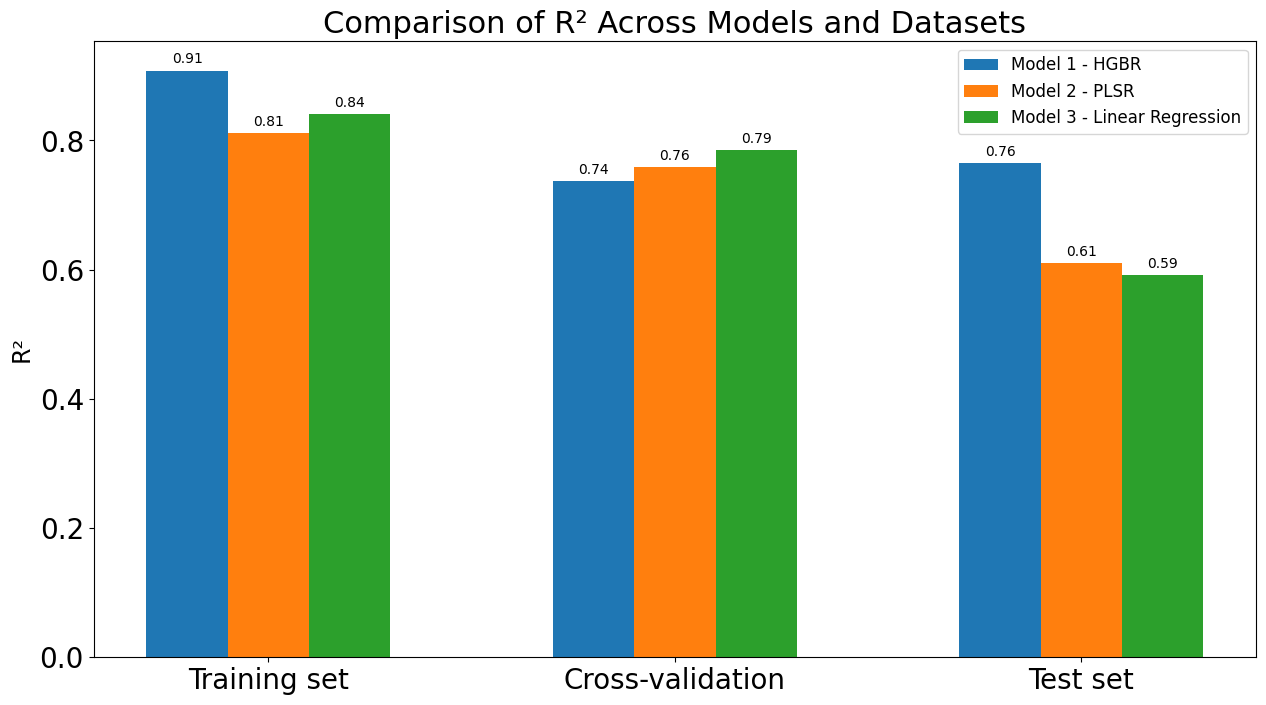

In [11]:
datasets = ['Training set', 'Cross-validation', 'Test set']
metrics = ['MSE', 'RMSE', 'R²']
models = ['Model 1 - HGBR', 'Model 2 - PLSR', 'Model 3 - Linear Regression']

# Performance data for each model [MSE, RMSE, R^2] for each dataset
performance = {
    'Model 1 - HGBR': {
        'Training set': [0.0256, 0.1600, 0.9081],
        'Cross-validation': [0.0731, 0.2704, 0.7375],
        'Test set': [0.0937, 0.3060, 0.7644]
    },
    'Model 2 - PLSR': {
        'Training set': [0.0524, 0.2290, 0.8117],
        'Cross-validation': [0.0673, 0.2594, 0.7584],
        'Test set': [0.1548, 0.3934, 0.6105]
    },
    'Model 3 - Linear Regression': {
        'Training set': [0.0441, 0.2102, 0.8414],
        'Cross-validation': [0.0597, 0.2444, 0.7854],
        'Test set': [0.1621, 0.4027, 0.5921]
    }
}

n_datasets = len(datasets)
n_metrics = len(metrics)
index = np.arange(n_datasets)
bar_width = 0.2
total_bar_group_width = bar_width * len(models)

for metric_idx, metric in enumerate(metrics):
    fig, ax = plt.subplots(figsize=(15, 8))

    for model_idx, model in enumerate(models):
        values = [performance[model][dataset][metric_idx] for dataset in datasets]
        bar_positions = index + model_idx * bar_width
        bars = ax.bar(bar_positions, values, bar_width, label=model)
        ax.bar_label(bars, labels=[f'{val:.2f}' for val in values], padding=3)

    # Adjust font sizes and titles
    ax.set_ylabel(metric, fontsize=17)
    ax.set_title(f'Comparison of {metric} Across Models and Datasets', fontsize=22)
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.legend(fontsize=12)

    # Set x-ticks to be at the center of the group of bars
    ax.set_xticks(index + total_bar_group_width / 2 - bar_width / 2)
    ax.set_xticklabels(datasets)

    plt.show()


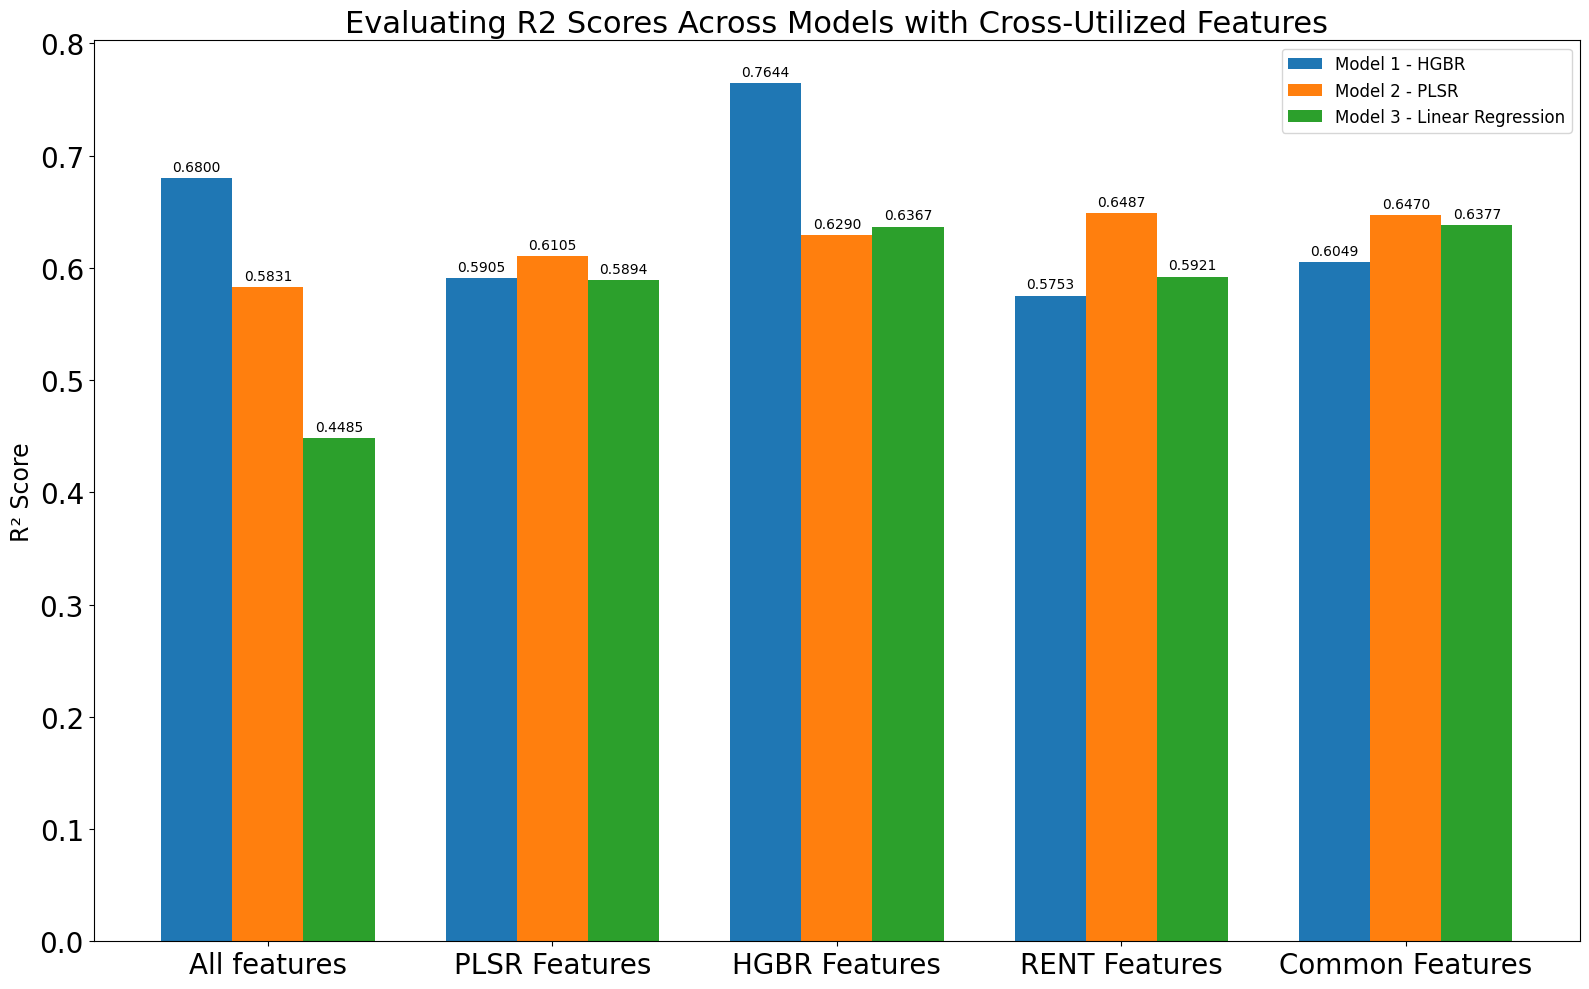

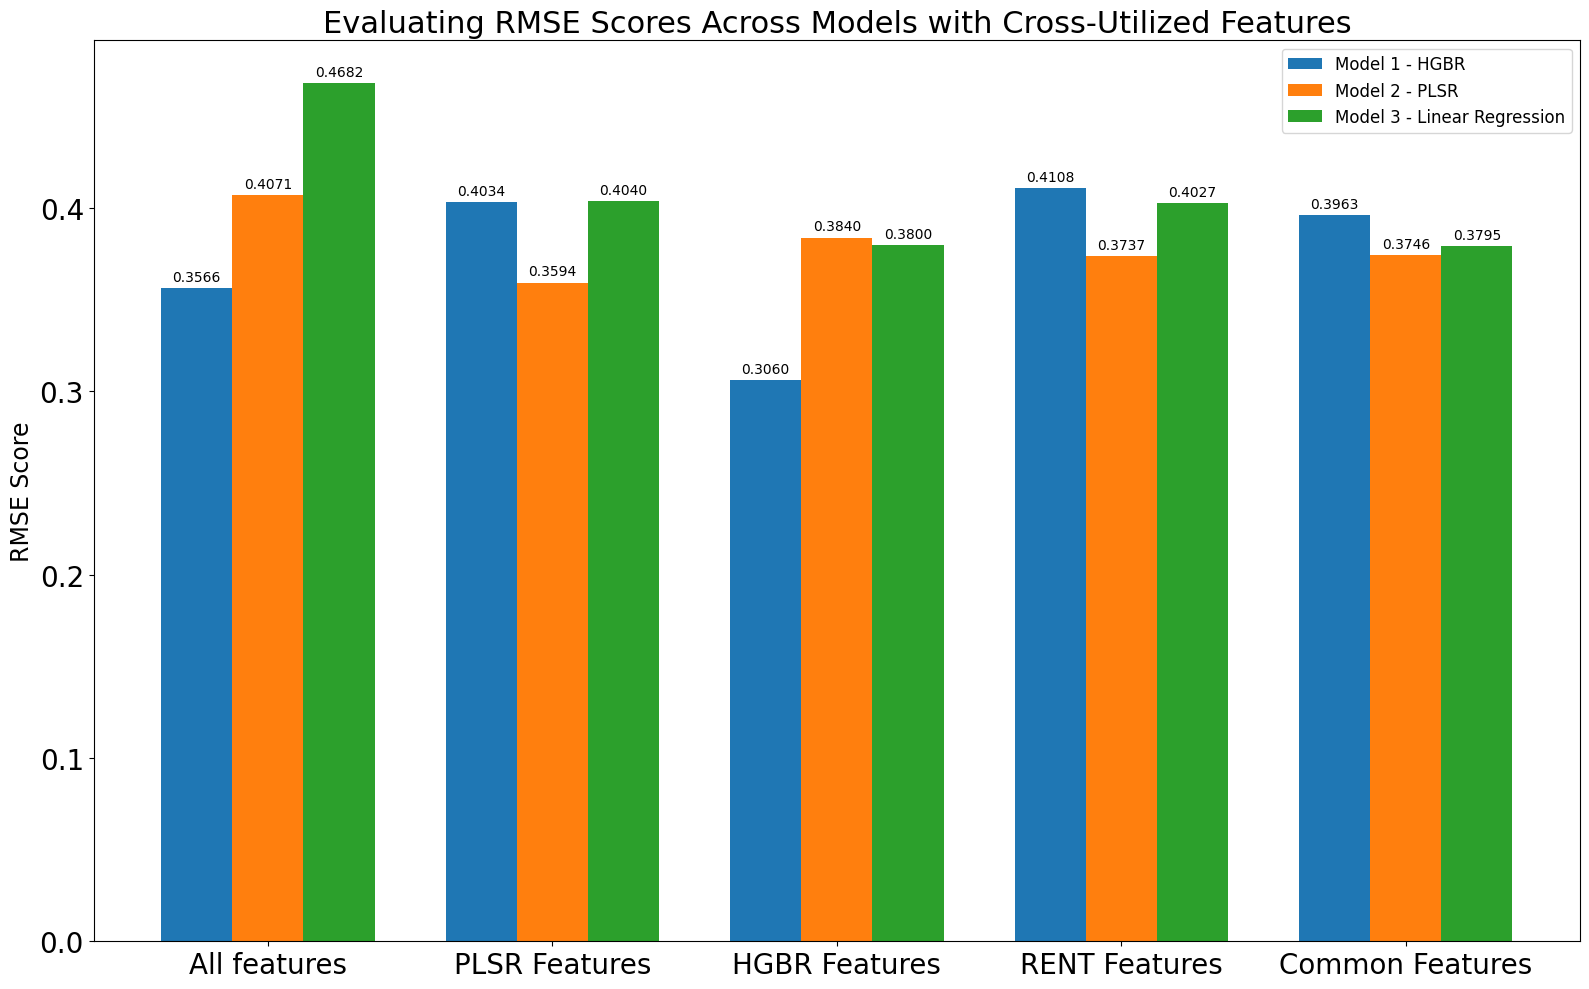

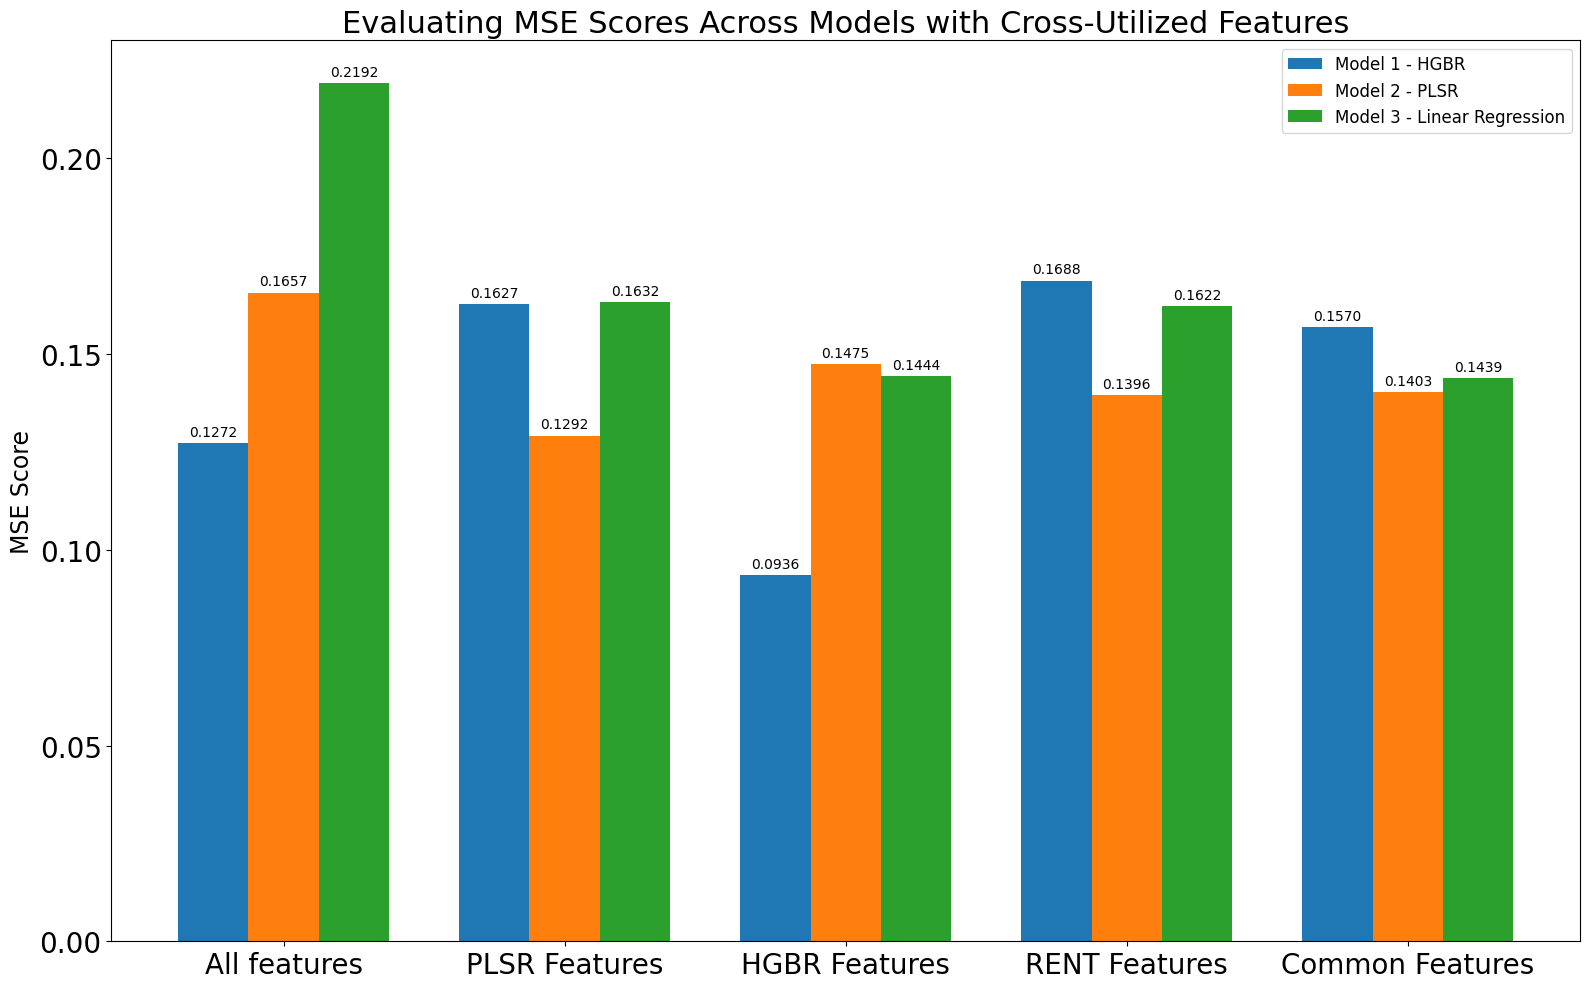

In [17]:
import numpy as np
import matplotlib.pyplot as plt

# Data from the image provided
data = {
    'PLSR': {'R2': [0.5831, 0.6105, 0.6290, 0.6487, 0.6470], 'RMSE': [0.4071, 0.3594, 0.3840, 0.3737, 0.3746], 'MSE': [0.1657, 0.1292, 0.1475, 0.1396, 0.1403]},
    'HGBR': {'R2': [0.6800, 0.5905, 0.7644, 0.5753, 0.6049], 'RMSE': [0.3566, 0.4034, 0.3060, 0.4108, 0.3963], 'MSE': [0.1272, 0.1627, 0.0936, 0.1688, 0.1570]},
    'RENT': {'R2': [0.4485, 0.5894, 0.6367, 0.5921, 0.6377], 'RMSE': [0.4682, 0.4040, 0.3800, 0.4027, 0.3795], 'MSE': [0.2192, 0.1632, 0.1444, 0.1622, 0.1439]}
}

feature_sets = ['All features', 'PLSR Features', 'HGBR Features', 'RENT Features', 'Common Features']
model_full_names = ['Model 1 - HGBR', 'Model 2 - PLSR', 'Model 3 - Linear Regression']
models_keys = ['HGBR', 'PLSR', 'RENT']

ind = np.arange(len(feature_sets))
width = 0.25

def add_labels(ax, rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

# Creating three separate figures for R², RMSE, and MSE
figs = ['R² Scores', 'RMSE Scores', 'MSE Scores']
scores = ['R2', 'RMSE', 'MSE']
y_labels = ['R² Score', 'RMSE Score', 'MSE Score']

for fig_title, score, y_label in zip(figs, scores, y_labels):
    fig, ax = plt.subplots(figsize=(16, 10))
    offset = (len(models_keys) - 1) * width / 2
    for i, model_key in enumerate(models_keys):
        values = data[model_key][score]
        bars = ax.bar(ind + i * width - offset, values, width, label=model_full_names[i])
        add_labels(ax, bars)

    ax.set_ylabel(y_label, fontsize=17)
    ax.set_title(f'Evaluating {score} Scores Across Models with Cross-Utilized Features', fontsize=22)
    ax.set_xticks(ind)
    ax.set_xticklabels(feature_sets, ha='center')
    ax.tick_params(axis='x', labelsize=20)
    ax.tick_params(axis='y', labelsize=20)
    ax.legend(fontsize=12)
    plt.tight_layout()
    plt.show()


